<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Polarization-Demo" data-toc-modified-id="Polarization-Demo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polarization Demo</a></span></li><li><span><a href="#Basic-Polarization-States" data-toc-modified-id="Basic-Polarization-States-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Polarization States</a></span></li><li><span><a href="#Linear-Polarizers" data-toc-modified-id="Linear-Polarizers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear Polarizers</a></span></li><li><span><a href="#Quarter-Wave-Plates" data-toc-modified-id="Quarter-Wave-Plates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quarter-Wave Plates</a></span></li><li><span><a href="#Half-Wave-Plates" data-toc-modified-id="Half-Wave-Plates-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Half-Wave Plates</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

# Polarization Demo

** EE/PHY 450/550**

** Scott Prahl**

** 7 Apr 2018, Version 1**

In [1]:
# Execute this cell first

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation


In [2]:
def linear_polarizer(theta):
    """A linear polarized with axis at angle of theta horizontal plane"""

    return np.matrix( [[np.cos(theta)**2, np.sin(theta)*np.cos(theta)], 
                       [np.sin(theta)*np.cos(theta), np.sin(theta)**2]] )


def retarder(theta, delta):
    """A half-wave plate with fast axis at angle of theta horizontal plane"""
    P = np.exp(+delta/2*1j)
    Q = np.exp(-delta/2*1j)
    D = np.sin(delta/2)*2j
    C = np.cos(theta)
    S = np.sin(theta)
    return np.array( [[C*C*P+S*S*Q, C*S*D], [C*S*D, C*C*Q+S*S*P]] )


def attenuator(od):
    """A neutral density filter with optical density od"""

    return np.matrix( [[10**-od/2, 0], [0, 10**-od/2]] )


def mirror():
    """Normal incidence on perfect mirror """
    return np.matrix([[1,0],[0,-1]])


def rotation(theta):
    """Rotation by an angle theta"""
    return np.array( [[np.cos(theta),np.sin(theta)], [-np.sin(theta), np.cos(theta)]] )

  
    
def quarter_wave_plate(theta):
    """A quarter-wave plate with fast axis at angle of theta horizontal plane"""

    return retarder(theta, np.pi/2)


def half_wave_plate(theta):
    """A half-wave plate with fast axis at angle of theta horizontal plane"""

    return retarder(theta, np.pi)


def linear_polarized(theta):
    """Jones Vector corresponding to a linear polarization with angle with horizontal plane"""

    A = np.array([np.cos(theta), np.sin(theta)])
    np.place(A,abs(A.real)<1e-9,0)
    return A


def right_circular_polarized():
    """Jones Vector corresponding to right circular polarisation"""

    return 1/np.sqrt(2)*np.array([1, -1j])


def left_circular_polarized():
    """Jones Vector corresponding to left circular polarisation"""

    return 1/np.sqrt(2)*np.array([1, 1j])


def horizontal_polarized():
    """Jones Vector corresponding to horizontal polarized light"""

    return linear_polarized(0)


def vertical_polarized():
    """Jones Vector corresponding to horizontal polarized light"""

    return linear_polarized(np.pi/2)


def simplify_jones_vector(v):
    """
    Method for transforming Jones vector to its simplified version.
    Simplification is required to calculate phase.
    """
    asqrt = np.sqrt(v[0] * np.conj(v[0]))
    if asqrt == 0.0:
        asqrt = 1
    a = self._vector[0] / asqrt
    if np.isnan(a) or a == 0.0:
        a = 1.0
    np.divide(self._vector, a, out=self._vector)

def normalize_vector(v):
    """
    Normalizes a vector by dividing each part by common number.
    After normalization the magnitude should be equal to ~1.
    """
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v/norm

def intensity(v):
    """
    Returns the intensity
    """
    return np.abs(v[0])**2 + np.abs(v[1])**2

def phase(v):
    gamma = np.angle(v[1])-np.angle([0])
    return gamma


def zero_if_near_zero(v):
    eps = 1e-9
    re = v.real
    im = v.imag

    if abs(v.real)<eps :
        if abs(v.imag)<eps :
            return complex(0,0)
        else :
            return complex(0,v.imag)
    else :
        if abs(v.imag)<eps :
            return complex(v.real,0)
        else :
            return v
 
zero_if_near_zero = np.vectorize(zero_if_near_zero)  

# Basic Polarization States

In [3]:
light=horizontal_polarized()
print("Jones vector for horizontally-polarized light")
print(light)

light=vertical_polarized()
print("Jones vector for vertically-polarized light")
print(light)

light = linear_polarized(np.radians(45))
print("Jones vector for 45° linearly polarized light")
print(light)

light = right_circular_polarized()
print("Jones vector for right circularly polarized light")
print(light)

light = left_circular_polarized()
print("Jones vector for left circularly polarized light")
print(light)

Jones vector for horizontally-polarized light
[1. 0.]
Jones vector for vertically-polarized light
[0. 1.]
Jones vector for 45° linearly polarized light
[0.70710678 0.70710678]
Jones vector for right circularly polarized light
[0.70710678+0.j         0.        -0.70710678j]
Jones vector for left circularly polarized light
[0.70710678+0.j         0.        +0.70710678j]


# Linear Polarizers

In [4]:
for theta in np.radians([0,45,90,-45]):
    print('Jones Matrix for perfect linear polarizer at angle theta=',theta/np.pi*180)
    L = linear_polarizer(theta)
    L = zero_if_near_zero(L)
    print(L)
    print()


Jones Matrix for perfect linear polarizer at angle theta= 0.0
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

Jones Matrix for perfect linear polarizer at angle theta= 45.0
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Jones Matrix for perfect linear polarizer at angle theta= 90.0
[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Jones Matrix for perfect linear polarizer at angle theta= -45.0
[[ 0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j]]



# Quarter-Wave Plates

In [5]:
for theta in np.radians([0,45,90,-45]):
    print('Jones Matrix for quarter wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = quarter_wave_plate(theta)
    L = zero_if_near_zero(L)
    print(L)
    norm = L[0,0]
    L = zero_if_near_zero(L/norm)
    print("and when scaled by so top left element is unity")
    print(L)

    print()

Jones Matrix for quarter wave plate with fast axis at angle theta= 0.0
[[0.70710678+0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j]]
and when scaled by so top left element is unity
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= 45.0
[[0.70710678+0.j         0.        +0.70710678j]
 [0.        +0.70710678j 0.70710678+0.j        ]]
and when scaled by so top left element is unity
[[1.+0.j 0.+1.j]
 [0.+1.j 1.+0.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= 90.0
[[0.70710678-0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
and when scaled by so top left element is unity
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

Jones Matrix for quarter wave plate with fast axis at angle theta= -45.0
[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]
and when scaled by so top left element is unity
[[1.+0.j 0.-1.j]

# Half-Wave Plates

In [6]:
for theta in np.radians([0,90]):
    print('Jones Matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = half_wave_plate(theta)
    print(zero_if_near_zero(L))
    norm = L[0,0]
    print("and when scaled by so top left element is unity")
    print(zero_if_near_zero(L/norm))
    print()
    
for theta in np.radians([45,-45]):
    print('Jones Matrix for half-wave plate with fast axis at angle theta=',theta/np.pi*180)
    L = half_wave_plate(theta)
    print(zero_if_near_zero(L))
    print()

Jones Matrix for half-wave plate with fast axis at angle theta= 0.0
[[0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j]]
and when scaled by so top left element is unity
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

Jones Matrix for half-wave plate with fast axis at angle theta= 90.0
[[0.-1.j 0.+0.j]
 [0.+0.j 0.+1.j]]
and when scaled by so top left element is unity
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

Jones Matrix for half-wave plate with fast axis at angle theta= 45.0
[[0.+0.j 0.+1.j]
 [0.+1.j 0.+0.j]]

Jones Matrix for half-wave plate with fast axis at angle theta= -45.0
[[0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j]]



# Visualization

In [29]:
def drawAxis(v, ax, last=4*np.pi):
    Ha, Va = np.abs(v)
    the_max = max(Ha, Va) * 1.1

    ax.plot([0, last], [0, 0], [0, 0], 'k')
    ax.plot([0, 0], [-the_max, the_max], [0, 0], 'g')
    ax.plot([0, 0], [0, 0], [-the_max, the_max], 'b')
    return


def drawHwave(v, ax, last=4*np.pi, offset=0):
    Hamp = abs(v[0])
    Hshift = np.angle(v[0])

    t = np.linspace(0, last, 100) + offset
    x = t - offset
    y = Hamp * np.cos(t - Hshift)
    z = 0 * t
    ax.plot(x, y, z, ':g')
    return


def drawVwave(v, ax, last=4*np.pi, offset=0):
    Vamp = abs(v[1])
    Vshift = np.angle(v[1])

    t = np.linspace(0, last, 100) + offset
    x = t - offset
    y = 0 * t
    z = Vamp * np.cos(t - Vshift)
    ax.plot(x, y, z, ':b')
    return


def drawSumwave(v, ax, last=4*np.pi, offset=0):
    Hamp, Vamp = np.abs(v)
    Hshift, Vshift = np.angle(v)

    t = np.linspace(0 + offset, last + offset, 100)
    x = t - offset
    yH = 0 * t
    yV = Hamp * np.cos(t - Hshift)
    zH = 0 * t
    zV = Vamp * np.cos(t - Vshift)
    y = yH + yV
    z = zH + zV
    ax.plot(x, y, z, 'r')
    return


def drawVectorSum(v, ax, offset=0):
    Hamp, Vamp = np.abs(v)
    Hshift, Vshift = np.angle(v)

    t = offset
    yH = 0 * t
    yV = Hamp * np.cos(t - Hshift)
    zH = 0 * t
    zV = Vamp * np.cos(t - Vshift)
    y = yH + yV
    z = zH + zV

    x1 = 0
    y1 = y
    z1 = 0
    x2 = 0
    y2 = y
    z2 = z
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'g--')

    x1 = 0
    y1 = 0
    z1 = z
    x2 = 0
    y2 = y
    z2 = z
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'b--')

    x1 = 0
    y1 = 0
    z1 = 0
    x2 = 0
    y2 = y
    z2 = z
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'r')
    ax.plot([x2], [y2], [z2], 'ro')
    return


def drawPropagatingWave(v, ax, off=0):
    
    drawAxis(v, ax)
    drawHwave(v, ax, offset=off)
    drawVwave(v, ax, offset=off)
    drawSumwave(v, ax, offset=off)
    drawVectorSum(v, ax, offset=off)

    ax.grid(False)
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    return


def drawPhaseDiagram(v, ax, off=0):
    Ha, Va = np.abs(v)
    Hoffset, Voffset = np.angle(v)
    the_max = max(Ha, Va) * 1.1

    xmax = the_max
    ymax = the_max
    ax.plot([-xmax, xmax], [0, 0], 'g')
    ax.plot([0, 0], [-ymax, ymax], 'b')

    t = np.linspace(0, 2*np.pi, 100) + off
    x = Ha * np.cos(t - Hoffset)
    y = Va * np.cos(t - Voffset)
    ax.plot(x, y, 'k')

    t = off
    x = Ha * np.cos(t - Hoffset)
    y = Va * np.cos(t - Voffset)
    ax.plot(x, y, 'ro')
    ax.plot([x, x], [0, y], 'g--')
    ax.plot([0, x], [y, y], 'b--')
    ax.plot([0, x], [0, y], 'r')

    ax.set_xlim(-xmax, xmax)
    ax.set_ylim(-ymax, ymax)
    ax.set_aspect('equal')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    return


def showPolarization(v, offset=0):
    fig = plt.figure(figsize=(8, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1 = plt.subplot(gs[0], projection='3d')
    ax2 = plt.subplot(gs[1])
    drawPropagatingWave(v, ax1, off=offset)
    drawPhaseDiagram(v, ax2, off=offset)
    return plt


def ani_update(startAngle, v, ax1, ax2):
    ax1.clear()
    ax2.clear()
    ax1 = drawPropagatingWave(v, ax1, off = startAngle)  
    ax2 = drawPhaseDiagram(v, ax2, off = startAngle)
    return ax1, ax2


def showPolarizationAnimation(v):
    fig = plt.figure(figsize=(8,4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1 = plt.subplot(gs[0],projection='3d')
    ax2 = plt.subplot(gs[1])

    startAngle = 0
    drawPropagatingWave(v, ax1, off = startAngle)  
    drawPhaseDiagram(v, ax2, off = startAngle)

    ani = animation.FuncAnimation(fig, ani_update, frames=np.linspace(0, 2*np.pi, 64), fargs=(v,ax1,ax2))
    return ani

<IPython.core.display.Javascript object>


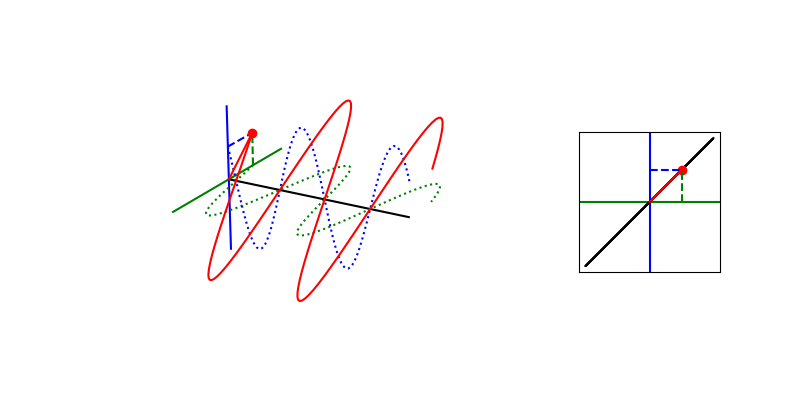

In [30]:
aplt = showPolarization(linear_polarized(np.radians(45)),offset=np.pi/3)
aplt.show()

<IPython.core.display.Javascript object>


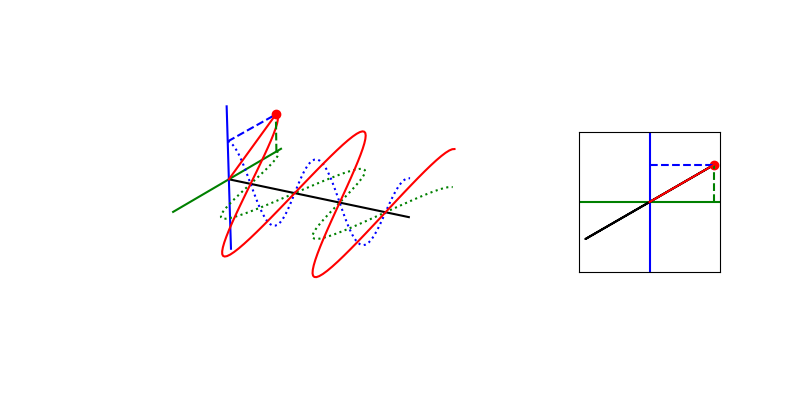

In [33]:
showPolarizationAnimation(linear_polarized(np.radians(30)))

<IPython.core.display.Javascript object>


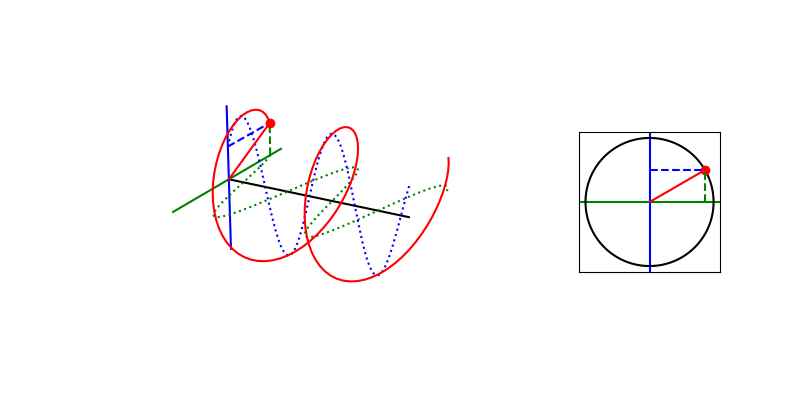

In [19]:
aplt = showPolarization(left_circular_polarized(),offset=np.pi/6)
aplt.show()

<IPython.core.display.Javascript object>


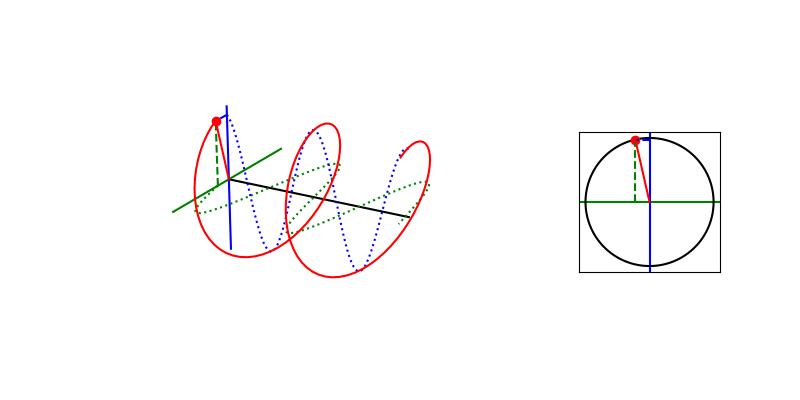

In [34]:
v=left_circular_polarized()
showPolarizationAnimation(v)

In [ ]:
def jones_check(jvec, numeric=False):
    '''
    Interprets a Jones vector and returns a string describing the polarization state.

    Original by Alexander Miles 9/12/2013

    jones_check(jvec, numeric=False)

    Parameters
    ----------
    jvec     : A two element iterable containing the x, y
               Jones vector components, in that order.
               The components may be complex valued.
    numeric  : Boolean. If set True the return will be a
               number corresponding to the state.
               0 = Linear
               1 = Right circular
              -1 = Left circular
               2 = Right elliptical
              -2 = Left elliptical

    Examples
    -------
    jones_check([1, -1j]) --> "Right circular polarization"

    jones_check([0.5, 0.5]) --> "Linear polarization at 45.000000 degrees CCW from x-axis"

    jones_check( np.array([exp(-1j*pi), exp(-1j*pi/3)]) ) --> Left elliptical polarization, rotated with respect to the axes
    ''' 

    try:
        j1, j2 = jvec
    except:
        print ("Jones vector must have two elements")
        return 0
    
    eps = 1e-12
    mag1, p1 = abs(j1), np.angle(j1)
    mag2, p2 = abs(j2), np.angle(j2)

    if np.remainder(p1 - p2, np.pi) < eps : 
        ang = np.arctan2(mag2, mag1)*180/np.pi 
        s = "Linear polarization at %f degrees CCW from x-axis" % ang
    else:
        if abs(mag1 -mag2) < eps:
            if abs(p1 - p2 -np.pi/2) < eps : 
                s = "Right Circular polarization"
            elif p1 > p2:
                s = "Right elliptical polarization, rotated with respect to the axes"
            if (p1 - p2 + np.pi/2)<eps: 
                s = "Left Circular polarization"
            elif p1 < p2:
                s = "Left elliptical polarization, rotated with respect to the axes"
        else:
            if p1 - p2 == np.pi/2 : 
                s = "Right elliptical polarization, non-rotated"
            elif p1 > p2:
                s = "Right elliptical polarization, rotated with respect to the axes"
            if p1 - p2 == -np.pi/2: 
                s = "Left Circular polarization, non-rotated"
            elif p1 < p2:
                s = "Left elliptical polarization, rotated with respect to the axes"
    return s


In [ ]:
jones_check([1, -1j])

In [ ]:
jones_check([0.5, 0.5])

In [ ]:
jones_check( np.array([np.exp(-1j*np.pi), np.exp(-1j*np.pi/3)]) )

In [ ]:
jones_check(horizontal_polarized())

In [ ]:
jones_check(vertical_polarized())

In [ ]:
np.remainder(-6.1,np.pi)

In [ ]:
jones_check(linear_polarized(np.radians(45)))